In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [16]:
# Load the dataset
df = pd.read_csv("heart.csv")

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df.shape

(918, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
# One-Hot Encoding for categorical variables
encode_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder()
ohe = pd.DataFrame(encoder.fit_transform(df[encode_cols]).toarray(), columns=encoder.get_feature_names_out(encode_cols))
df = pd.concat([df.drop(encode_cols, axis=1), ohe], axis=1)

In [22]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
# Scale numerical features
numerical_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [24]:
# Separate features and target
y = df['HeartDisease']
x = df.drop('HeartDisease', axis=1)


Model: Logistic Regression
Accuracy: 87.68%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



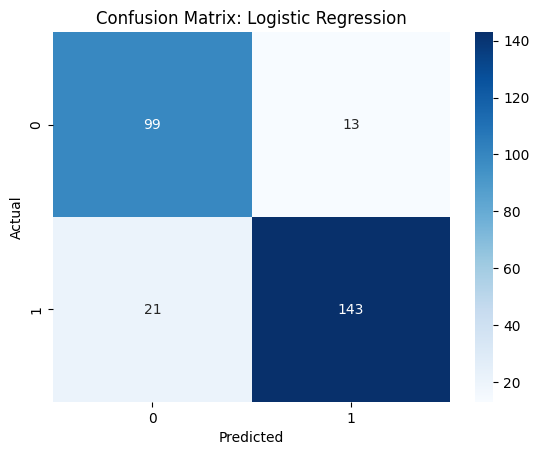


Model: SVM
Accuracy: 85.87%
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.91      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



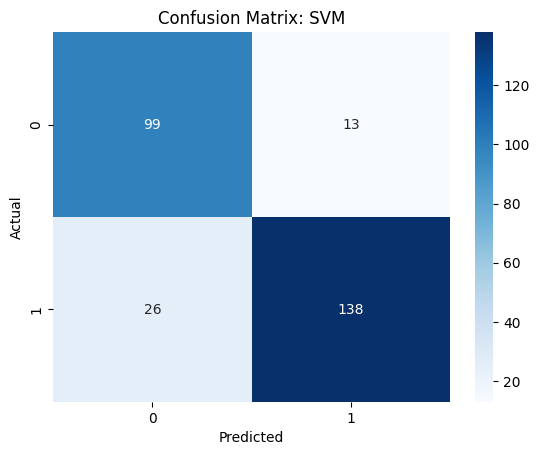


Model: Decision Tree
Accuracy: 75.00%
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       112
           1       0.83      0.73      0.78       164

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.76      0.75      0.75       276



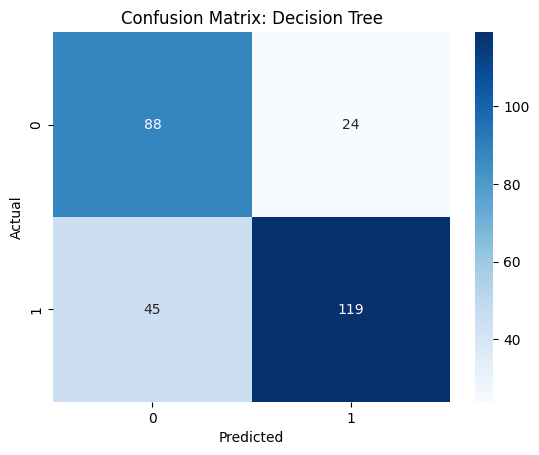


Model: Random Forest
Accuracy: 88.77%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       112
           1       0.91      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276



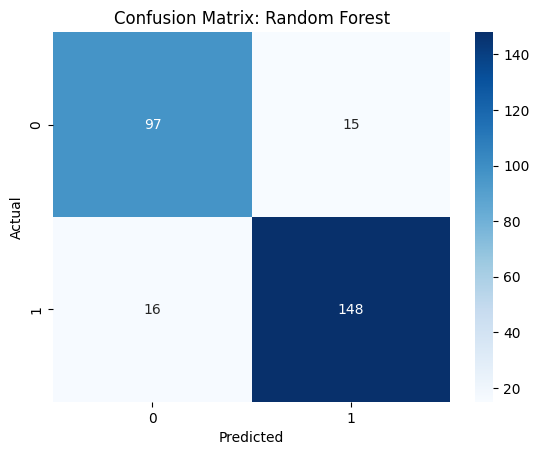


Model: KNN
Accuracy: 84.78%
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276



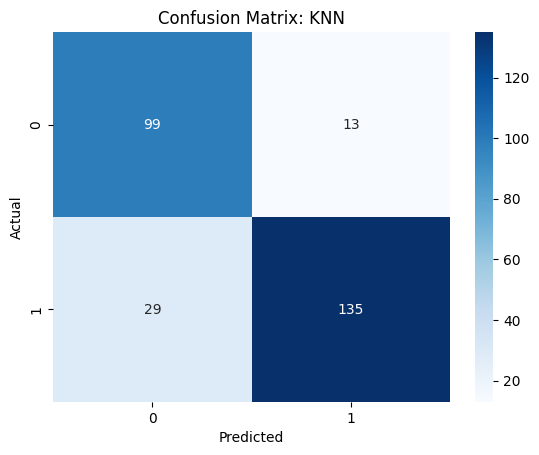


Model: Naive Bayes
Accuracy: 88.41%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



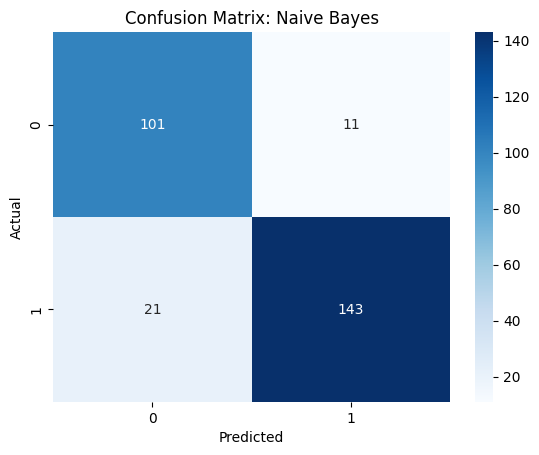


Model: Gradient Boosting
Accuracy: 87.68%
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       112
           1       0.93      0.86      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



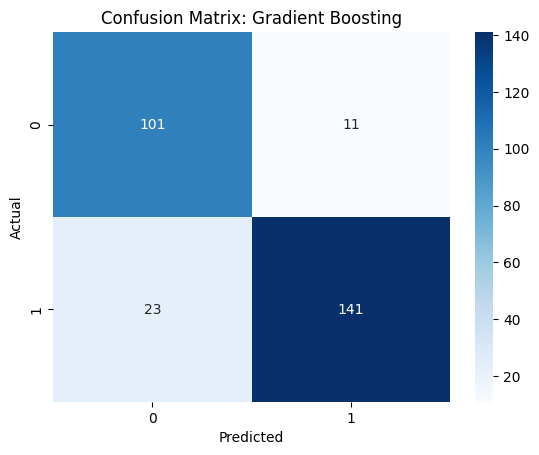

C:\Users\firas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: AdaBoost
Accuracy: 86.59%
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       112
           1       0.93      0.84      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



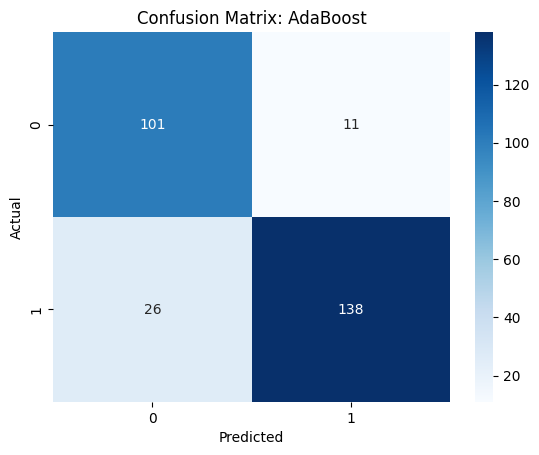

C:\Users\firas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
Accuracy: 87.32%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



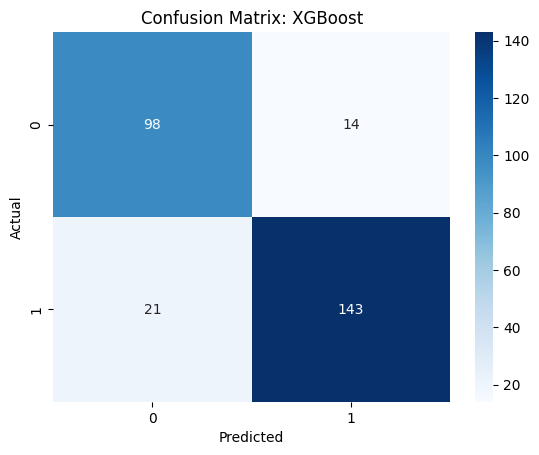

[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

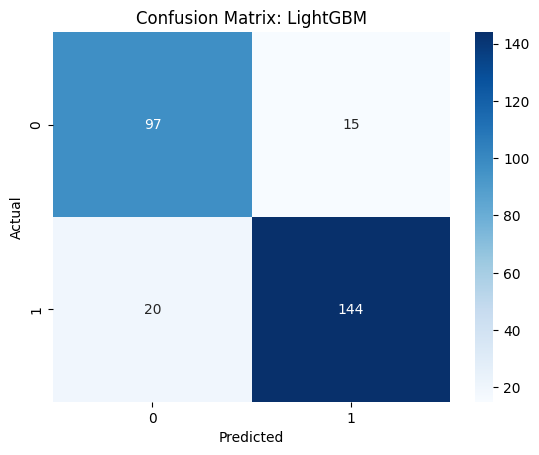

C:\Users\firas\AppData\Local\Temp\ipykernel_17848\723582500.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="mako")


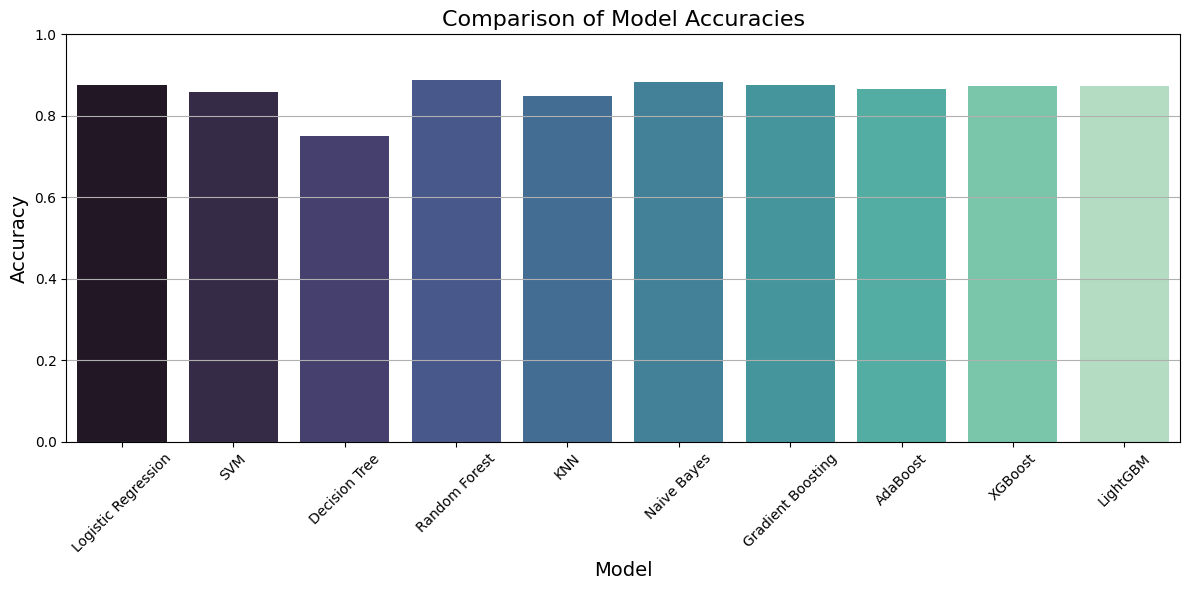

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(force_col_wise=True, deterministic=True)
}
accuracy_scores = {}

# Train models and evaluate
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy  # Store accuracy

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --- Visualization: Bar Chart for Accuracy ---
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="mako")
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

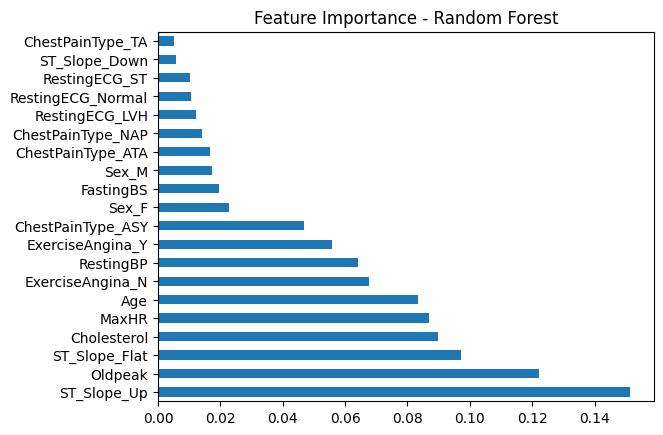

In [37]:
# Feature Importance for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
importance = pd.Series(rf_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
importance.plot(kind='barh', title='Feature Importance - Random Forest')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

# --- Random Forest Hyperparameter Tuning ---
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, 
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(x_train, y_train)

print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Accuracy: {rf_grid_search.best_score_:.4f}")

# Evaluate on test set
rf_best_model = rf_grid_search.best_estimator_
rf_test_accuracy = rf_best_model.score(x_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

# --- Naive Bayes Hyperparameter Tuning ---
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, 
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
nb_grid_search.fit(x_train, y_train)

print(f"Best Naive Bayes Parameters: {nb_grid_search.best_params_}")
print(f"Best Naive Bayes Accuracy: {nb_grid_search.best_score_:.4f}")

# Evaluate on test set
nb_best_model = nb_grid_search.best_estimator_
nb_test_accuracy = nb_best_model.score(x_test, y_test)
print(f"Naive Bayes Test Accuracy: {nb_test_accuracy:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8660
Random Forest Test Accuracy: 0.8986
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Naive Bayes Parameters: {'var_smoothing': 1e-09}
Best Naive Bayes Accuracy: 0.8442
Naive Bayes Test Accuracy: 0.8841
